# FRICOSIPY Result Viewer

In [9]:
# Load Python Modules
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams["figure.figsize"] = (12, 6)

In [ ]:
filename = '<output.nc>' # Specify the output NetCDF dataset filename

In [5]:
# Loads the NetCDF file using the Xarray package.
data_path = './data/output/'
ds = xr.open_dataset(os.path.join(data_path,filename))

In [5]:
ds = xr.open_dataset('Output_PM_Test_36_NEW.nc')

In [6]:
ds # Opens the Xarray interactive dataset viewer, showing the dataframe co-ordinates, variables and attributes (parameters).

<xarray.Dataset> Size: 1GB
Dimensions:                 (y: 1, x: 1, time: 61368, layer: 500)
Coordinates:
  * y                       (y) int64 8B 1136550
  * x                       (x) int64 8B 2604350
  * time                    (time) datetime64[ns] 491kB 2018-01-01 ... 2024-1...
Dimensions without coordinates: layer
Data variables: (12/54)
    ELEVATION               (y, x) float64 8B ...
    MASK                    (y, x) float64 8B ...
    SLOPE                   (y, x) float64 8B ...
    ASPECT                  (y, x) float64 8B ...
    EASTING                 (y, x) float64 8B ...
    NORTHING                (y, x) float64 8B ...
    ...                      ...
    LAYER_POROSITY          (time, y, x, layer) float32 123MB ...
    LAYER_ICE_FRACTION      (time, y, x, layer) float32 123MB ...
    LAYER_IRR_WATER         (time, y, x, layer) float32 123MB ...
    LAYER_REFREEZE          (time, y, x, layer) float32 123MB ...
    LAYER_HYDRO_YEAR        (time, y, x, layer) float32 123MB ...
    LAYER_GRAIN_SIZE        (time, y, x, layer) float32 123MB ...
Attributes: (12/75)
    Compression_level:                  2
    Full_field:                         True
    Snow_density_method:                constant
    Albedo_method:                      Oerlemans98
    Densification_method:               Boone02
    Penetrating_method:                 Bintanja95
    ...                                 ...
    R_watervapour:                      462.0
    R_dryair:                           287.0
    Optical_depth:                      1.6
    exp_aerosol:                        0.97
    Stefan-Boltzmann_constant:          5.67e-08
    Zero_temperature:                   273.16

## Point Surface Energy Balance (SEB) 
Produces a graphical representation of the surface energy balance for a single spatial node (expressed as mean monthly energy fluxes).

In [10]:
x = 2604350 # Easting  (X-coordinate) of chosen spatial node.
y = 1136550 # Northing (Y-coordinate) of chosen spatial node.

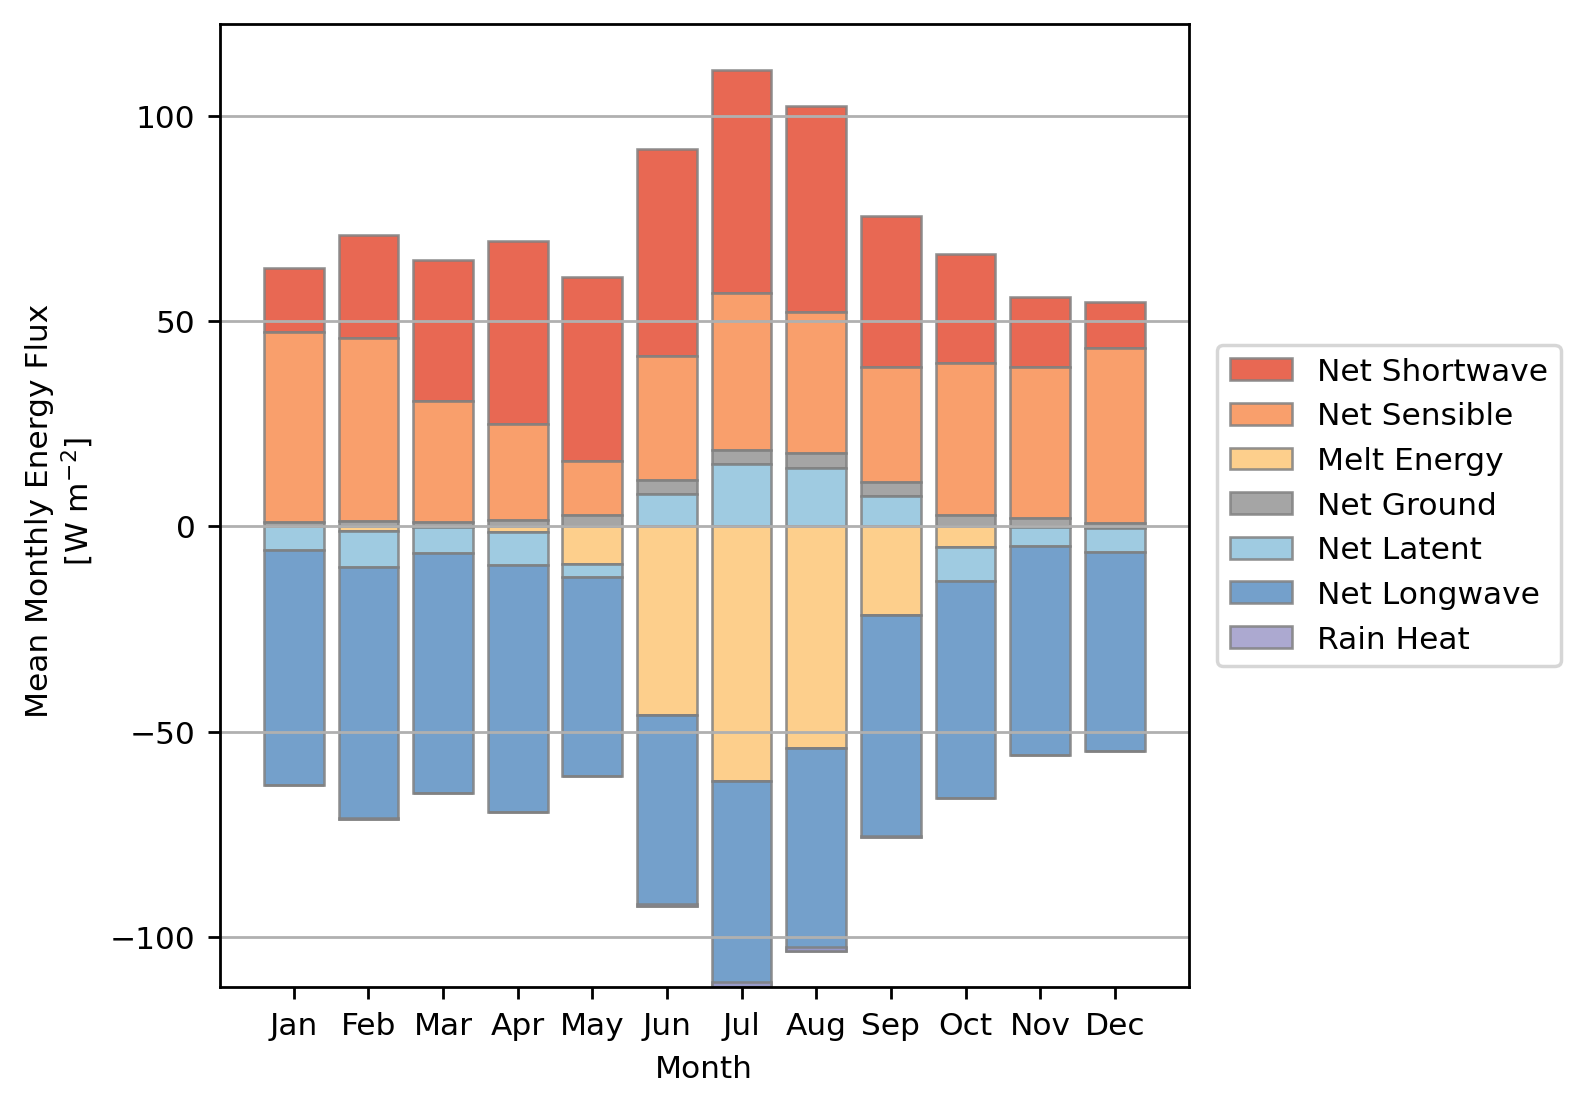

In [11]:
# Calculate the mean annual energy fluxes:
SHORTWAVE = ds.SHORTWAVE.sel(x = x, y = y).groupby("time.month").mean("time")
SENSIBLE = ds.SENSIBLE.sel(x = x, y = y).groupby("time.month").mean("time")
GROUND = ds.GROUND.sel(x = x, y = y).groupby("time.month").mean("time")
MELT = ds.MELT_ENERGY.sel(x = x, y = y).groupby("time.month").mean("time") * -1
LATENT = ds.LATENT.sel(x = x, y = y).groupby("time.month").mean("time")
LONGWAVE = ds.LONGWAVE.sel(x = x, y = y).groupby("time.month").mean("time")
RAIN_HEAT = ds.RAIN_FLUX.sel(x = x, y = y).groupby("time.month").mean("time")

# Seperate bi-directional energy fluxes:
GROUND_POSITIVE = np.where(GROUND < 0, 0, GROUND)
GROUND_NEGATIVE = np.where(GROUND > 0, 0, GROUND)
LATENT_POSITIVE = np.where(LATENT < 0, 0, LATENT)
LATENT_NEGATIVE = np.where(LATENT > 0, 0, LATENT)
LONGWAVE_POSITIVE = np.where(LONGWAVE < 0, 0, LONGWAVE)
LONGWAVE_NEGATIVE = np.where(LONGWAVE > 0, 0, LONGWAVE)    
    
# Import colourmaps:
Grey = mpl.colormaps['Greys']
RdYlBu = mpl.colormaps['RdYlBu']
Purples = mpl.colormaps['Purples']

# Setup Figure & Axis:
plt.rcParams.update({'font.size': 9})
fig, ax = plt.subplots(1,1,figsize=(5,5), dpi = 250)
ax.set(ylabel = "Mean Monthly Energy Flux \n [W m$^{-2}$]", xlabel = "Month")
ax.grid(visible=True, which='major', axis='y')

# Bar Chart:
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
ax.bar(months, SHORTWAVE,         width = 0.8, color = RdYlBu(0.15),  alpha = 0.85, edgecolor = "gray", linewidth = 0.75, bottom = LONGWAVE_POSITIVE + LATENT_POSITIVE + GROUND_POSITIVE + SENSIBLE, label = "Net Shortwave")
ax.bar(months, SENSIBLE,          width = 0.8, color = RdYlBu(0.25),  alpha = 0.85, edgecolor = "gray", linewidth = 0.75, bottom = LONGWAVE_POSITIVE + LATENT_POSITIVE + GROUND_POSITIVE, label = "Net Sensible")
ax.bar(months, GROUND_POSITIVE,   width = 0.8, color = Grey(0.5),     alpha = 0.85, edgecolor = "gray", linewidth = 0.75, bottom = LONGWAVE_POSITIVE + LATENT_POSITIVE)
ax.bar(months, LATENT_POSITIVE,   width = 0.8, color = RdYlBu(0.75),  alpha = 0.85, edgecolor = "gray", linewidth = 0.75, bottom = LONGWAVE_POSITIVE)
ax.bar(months, LONGWAVE_POSITIVE, width = 0.8, color = RdYlBu(0.85),  alpha = 0.85, edgecolor = "gray", linewidth = 0.75)
ax.bar(months, MELT,              width = 0.8, color = RdYlBu(0.35),  alpha = 0.85, edgecolor = "gray", linewidth = 0.75, label = "Melt Energy")    
ax.bar(months, GROUND_NEGATIVE,   width = 0.8, color = Grey(0.5),     alpha = 0.85, edgecolor = "gray", linewidth = 0.75, bottom = MELT, label = "Net Ground")
ax.bar(months, LATENT_NEGATIVE,   width = 0.8, color = RdYlBu(0.75),  alpha = 0.85, edgecolor = "gray", linewidth = 0.75, bottom = MELT + GROUND_NEGATIVE, label = "Net Latent")
ax.bar(months, LONGWAVE_NEGATIVE, width = 0.8, color = RdYlBu(0.85),  alpha = 0.85, edgecolor = "gray", linewidth = 0.75, bottom = MELT + GROUND_NEGATIVE + LATENT_NEGATIVE, label = "Net Longwave")
ax.bar(months, RAIN_HEAT,         width = 0.8, color = Purples(0.50), alpha = 0.85, edgecolor = "gray", linewidth = 0.75, bottom = MELT + GROUND_NEGATIVE + LATENT_NEGATIVE + LONGWAVE_NEGATIVE, label = "Rain Heat")

# Figure Legend:
plt.legend(loc="center right", bbox_to_anchor=(1.4,0.5));

## Point Surface Mass Balance (SMB)
Produces a graphical representation of the surface mass balance for a single spatial node (expressed as mean monthly mass fluxes).

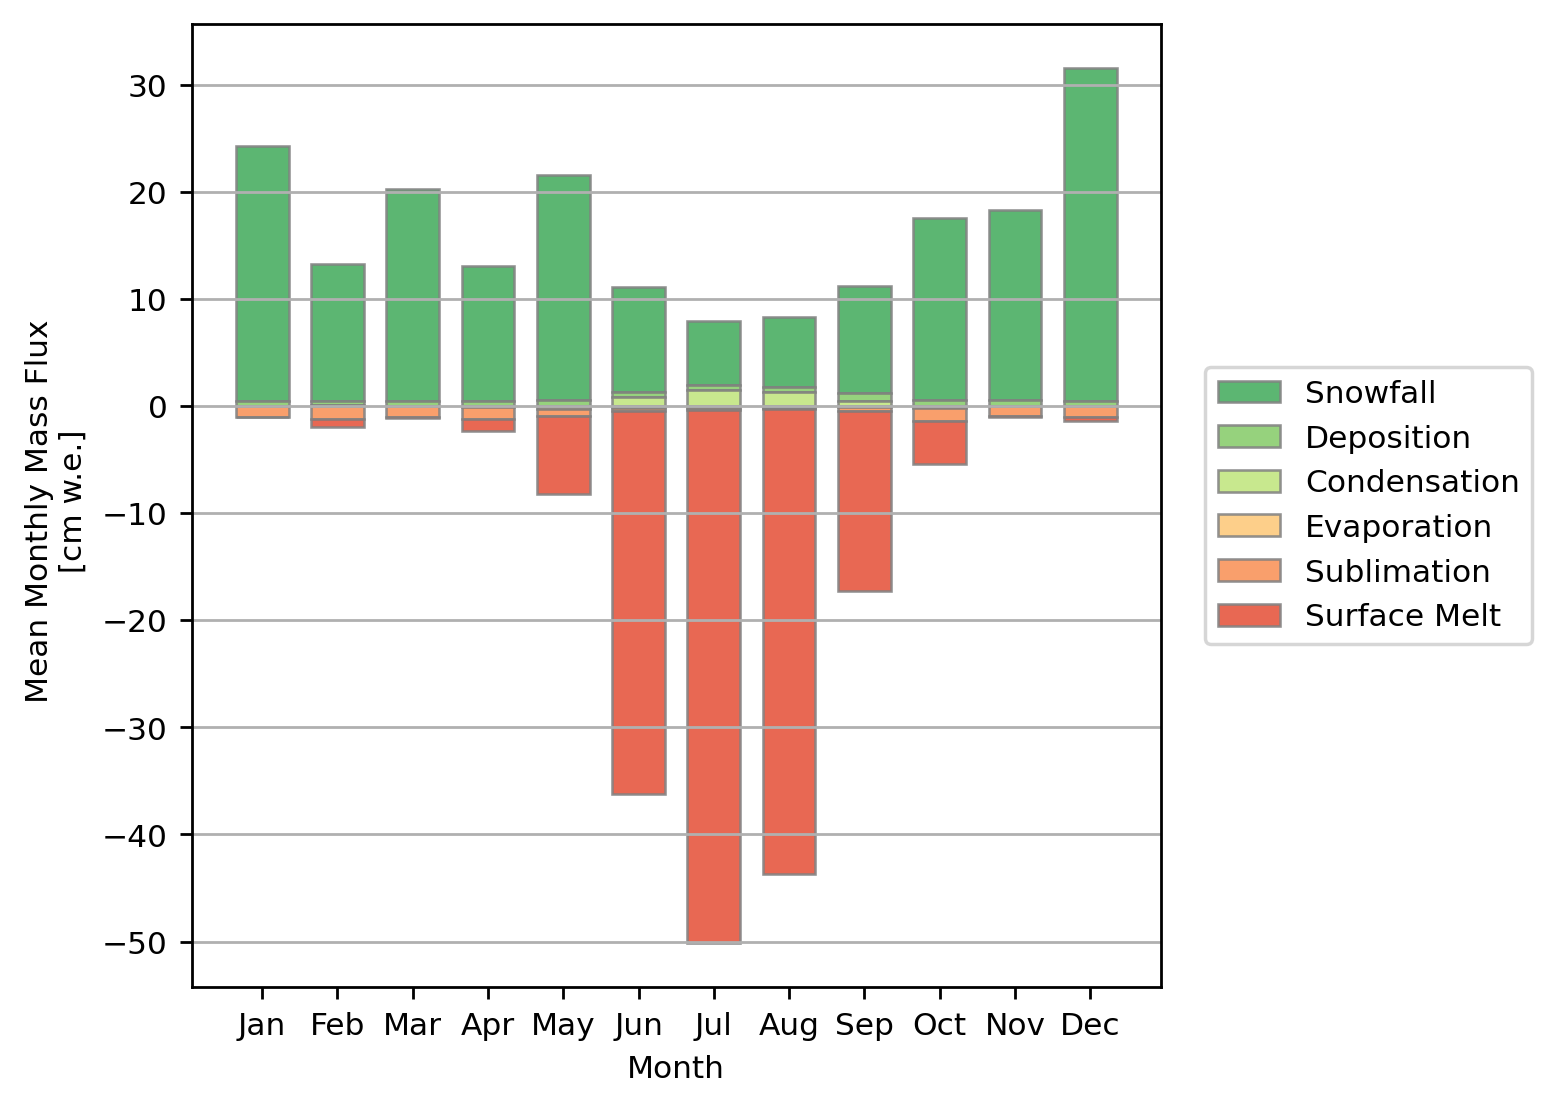

In [12]:
# Calculate the mean annual mass fluxes:
years = ds.time.dt.year.count()
SNOWFALL = ds.SNOWFALL.sel(x = x, y = y).resample(time='ME').sum().groupby("time.month").mean("time").values * 100
DEPOSITION = ds.DEPOSITION.sel(x = x, y = y).resample(time='ME').sum().groupby("time.month").mean("time").values * 100
CONDENSATION = ds.CONDENSATION.sel(x = x, y = y).resample(time='ME').sum().groupby("time.month").mean("time").values * 100
EVAPORATION = ds.EVAPORATION.sel(x = x, y = y).resample(time='ME').sum().groupby("time.month").mean("time").values * 100
SUBLIMATION = ds.SUBLIMATION.sel(x = x, y = y).resample(time='ME').sum().groupby("time.month").mean("time").values * 100
SURFACE_MELT = ds.SURFACE_MELT.sel(x = x, y = y).resample(time='ME').sum().groupby("time.month").mean("time").values * -100

# Import colourmaps:
RdYlGn = mpl.colormaps['RdYlGn']

# Setup Figure & Axis:
plt.rcParams.update({'font.size': 9})
fig, ax = plt.subplots(1,1,figsize=(5,5), dpi = 250)
ax.set(ylabel = "Mean Monthly Mass Flux \n [cm w.e.]", xlabel = "Month")
ax.grid(visible=True, which='major', axis='y')

# Bar Chart:
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
ax.bar(months, SNOWFALL, width = 0.7, color = RdYlGn(0.85), alpha = 0.85, edgecolor = "gray", linewidth = 0.75, bottom = CONDENSATION + DEPOSITION, label = "Snowfall")
ax.bar(months, DEPOSITION, width = 0.7, color = RdYlGn(0.75), alpha = 0.85, edgecolor = "gray", linewidth = 0.75, bottom = CONDENSATION, label = "Deposition")
ax.bar(months, CONDENSATION, width = 0.7, color = RdYlGn(0.65), alpha = 0.85, edgecolor = "gray", linewidth = 0.75, label = "Condensation")
ax.bar(months, EVAPORATION, width = 0.7, color = RdYlGn(0.35), alpha = 0.85, edgecolor = "gray", linewidth = 0.75, label = "Evaporation")
ax.bar(months, SUBLIMATION, width = 0.7, color = RdYlGn(0.25), alpha = 0.85, edgecolor = "gray", linewidth = 0.75, bottom = EVAPORATION, label = "Sublimation")
ax.bar(months, SURFACE_MELT, width = 0.7, color = RdYlGn(0.15), alpha = 0.85, edgecolor = "gray", linewidth = 0.75, bottom = EVAPORATION + SUBLIMATION, label = "Surface Melt")

# Figure Legend:
plt.legend(loc="center right", bbox_to_anchor=(1.4,0.5));